# Demo of STARCOP models on AVIRIS data

Demos with model loading and inference on AVIRIS data from the test set.

In [1]:
!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 98.0 MB/s eta 0:00:00


In [2]:
# Clone the repository:
!git clone https://github.com/spaceml-org/STARCOP.git

Cloning into 'STARCOP'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 160 (delta 52), reused 119 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 8.56 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [3]:
# Data:
# STARCOP_mini.zip with 261 MB
!gdown https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl -O STARCOP_mini.zip

# Models:
!gdown https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX -O multistarcop_varon.zip
!gdown https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql -O hyperstarcop_magic_rgb.zip

Downloading...
From (original): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl
From (redirected): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl&confirm=t&uuid=e3be3355-cfcf-45bf-a698-4e05904a3fdf
To: /content/STARCOP_mini.zip
100% 274M/274M [00:07<00:00, 35.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX
From (redirected): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX&confirm=t&uuid=37f25468-2ffd-4fdf-86bb-6f645ad59de2
To: /content/multistarcop_varon.zip
100% 73.5M/73.5M [00:02<00:00, 30.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql
From (redirected): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql&confirm=t&uuid=bc0e2303-6c30-471e-8394-f4d9c8614abc
To: /content/hyperstarcop_magic_rgb.zip
100% 73.3M/73.3M [00:03<00:00, 24.4MB/s]


In [4]:
!unzip -q STARCOP_mini.zip
!unzip -q multistarcop_varon.zip
!unzip -q hyperstarcop_magic_rgb.zip
# clean-up
!rm *.zip

In [12]:
!ls

bash		LICENSE    README.md		     requirements.txt  setup.py
_illustrations	notebooks  requirements_package.txt  scripts	       starcop


In [1]:
%cd /content/STARCOP

/content/STARCOP


In [7]:
!pip --quiet install -r requirements.txt
# ignore the warnings about the library versions

Requested pytorch-lightning==1.6.4 from https://files.pythonhosted.org/packages/79/f9/37f4fd369652a80a1def12ce5af44be93ee7b66dd4de464d37141e29ed58/pytorch_lightning-1.6.4-py3-none-any.whl (from -r requirements.txt (line 4)) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    torch (>=1.8.*)
           ~~~~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement pytorch-lightning==1.6.4 (from versions: 0.0.2, 0.2, 0.2.2, 0.2.3, 0.2.4, 0.2.4.1, 0.2.5, 0.2.5.1, 0.2.5.2, 0.2.6, 0.3, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.4.1, 0.3.5, 0.3.6, 0.3.6.1, 0.3.6.3, 0.3.6.4, 0.3.6.5, 0.3.6.6, 0.3.6.7, 0.3.6.8, 0.3.6.9, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.5.0, 0.5.1, 0.5.1.2, 0.5.1.3, 0.5.2, 0.5.2.1, 0.5.3, 0.5.3.1, 0.5.3.2, 0.5.3.3, 0.6.0, 0.7.1, 0.7.3, 0.7.5, 0.7.6, 0.8.1, 0.8.3, 0.8.4, 0.8.5, 0.9.0, 0.10.0, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1

In [8]:
# additional libraries and exact versions:
!pip install git+https://github.com/spaceml-org/georeader.git
!pip install torchtext==0.14.1

  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-v5biwimf
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-v5biwimf
  Resolved https://github.com/spaceml-org/georeader.git to commit 164cb852924039bf925f2a9623898804996052df
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for georeader-spaceml: filename=georeader_spaceml-1.3.13-py3-none-any.whl size=165112 sha256=a7b35d44448d07c2e19d1b3e393c4182b9542a42b1ea403b211c7f6488a6ddad
  Stored in directory: /tmp/pip-ephem-wheel-cache-67v90dws/wheels/cd/34/57/784cd337e7393b168823abf3147bf7921b7aca950b1bdb80da
Successfully built georeader-spaceml
ERROR: Could not find a version that satisfies the requirement torchtext==0.14.1 (from versions: 0.1.1, 0.2.0, 0.2.1, 0.2.3, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1

In [9]:
assert False
# please restart the runtime with the button above ^

AssertionError: 

In [2]:
%cd /content/STARCOP

/content/STARCOP


In [13]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=10bcd91310126ce80856f129556319b473d4617516b6f973ddaefc1772886a45
  Stored in directory: /root/.cache/pip/wheels/1a/97/32/461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built antlr4-python3-runtime


In [4]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 52.0 MB/s eta 0:00:00


In [6]:
!pip install kornia


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.9 MB/s eta 0:00:00


In [7]:
import omegaconf
import pylab as plt
import torch
import omegaconf
import fsspec
import os
import json
import pandas as pd
import numpy as np
from starcop.torch_utils import to_device
import starcop.plot as starcoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable

from starcop.data.datamodule import Permian2019DataModule
from starcop.models.model_module import ModelModule
from starcop.validation import run_validation

device = torch.device("cuda:0")
fs = fsspec.filesystem("gs")
config_general = omegaconf.OmegaConf.load("scripts/configs/config.yaml")
root_folder = "/content/STARCOP_mini"

## HyperSTARCOP

In [8]:
hsi_model_path = "/content/hyperstarcop_magic_rgb/final_checkpoint_model.ckpt"
hsi_config_path = "/content/hyperstarcop_magic_rgb/config.yaml"

In [10]:
!pip install segmentation-models-pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 12.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=3942d7eebdee47678df072c5409e2247c57bc1f17fd2ced915622a834d0422ce
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=629115c8373812b961896569df587f6573b33188a31ac2c272a1e3cc670740e7
  Stored in directory: /root/.cache/pip/wheels/5f/5b/96/fd94bc35962d7c6b699e8814db545155ac91d2b95785e1b035
Successfully built efficientnet-pytorch pretrainedmodels


In [11]:
def load_model_with_datamodule(model_path, config_path):
    config_model = omegaconf.OmegaConf.load(config_path)
    config = omegaconf.OmegaConf.merge(config_general, config_model)

    import ast
    dataset_dict = ast.literal_eval(config_model['_content']['value']['dataset'])
    dataset_dict['root_folder'] = root_folder
    dataset_dict['train_csv'] = '/content/STARCOP_mini/train_mini10.csv'
    config.dataset = dataset_dict
    config.products_plot = config_model['_content']['value']['products_plot']

    data_module = Permian2019DataModule(config)
    data_module.test_csv = '/content/STARCOP_mini/test_mini10.csv'
    data_module.settings['dataset'] = dataset_dict
    data_module.prepare_data()

    model = ModelModule.load_from_checkpoint(model_path, settings=config)
    model.to(device)
    model.eval() # !

    print("Loaded model with",model.num_channels,"input channels, data module with", len(data_module.input_products), "inputs:", data_module.input_products, ", for plotting we use these products:", config.products_plot)

    return model, data_module, config

hsi_model, hsi_dm, hsi_config = load_model_with_datamodule(hsi_model_path, hsi_config_path)
print("successfully loaded HyperSTARCOP model!")

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../hyperstarcop_magic_rgb/final_checkpoint_model.ckpt`


Loaded model with 4 input channels, data module with 4 inputs: ['mag1c', 'TOA_AVIRIS_640nm', 'TOA_AVIRIS_550nm', 'TOA_AVIRIS_460nm'] , for plotting we use these products: ['rgb_aviris', 'mag1c', 'label', 'pred', 'differences']
successfully loaded HyperSTARCOP model!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


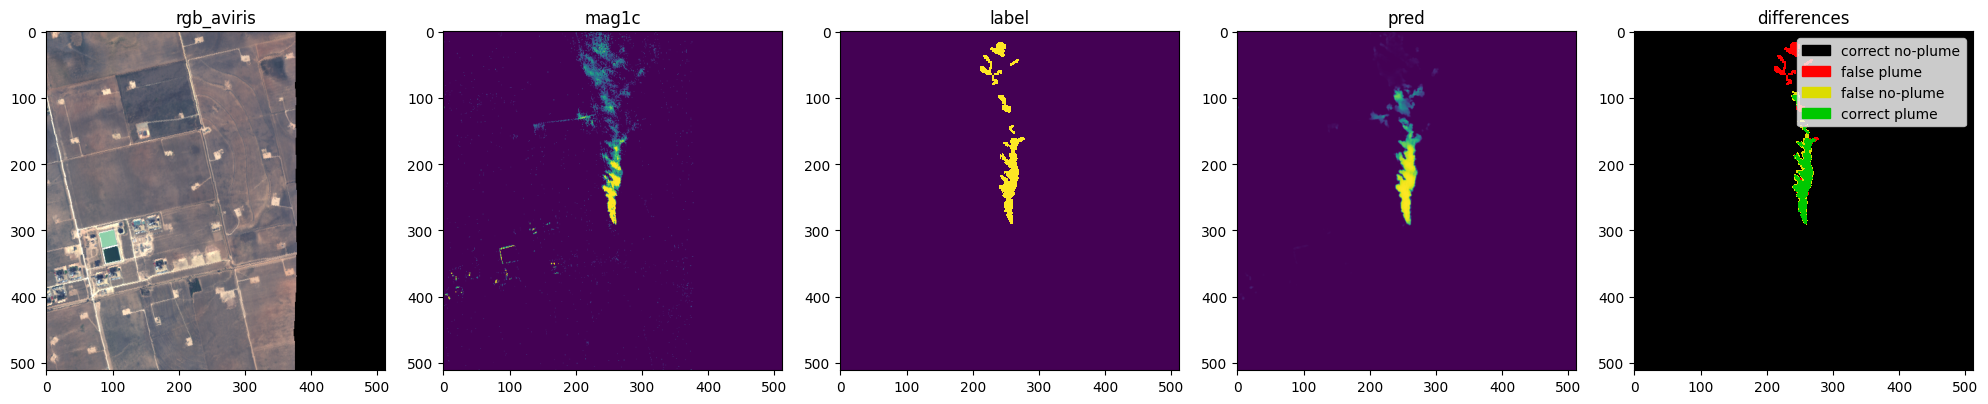

In [12]:
dataloader = hsi_dm.test_dataloader(batch_size=1)
how_many = 1
for i, plume_data in enumerate(dataloader):
    plume_data = hsi_model.batch_with_preds(to_device(plume_data, hsi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=hsi_config.dataset.input_products,
                                products_plot=hsi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    how_many -=1
    if how_many <= 0: break

In [ ]:
# from starcop.validation import run_validation
# dataloader = hsi_dm.test_dataloader(batch_size=1)
# hsi_metrics_per_id, hsi_metrics = run_validation(hsi_model, dataloader, products_plot=hsi_config.products_plot, verbose=True,
#                                           show_plots=True, skip_saving_plots=True, # < for showing
#                                           #show_plots=False, skip_saving_plots=False, # < for saving
#                                           path_save_results="hyperstarcop_outputs")

# # Note: The metrics on this small subset, don't make much sense

## MultiSTARCOP

In [13]:
msi_model_path = "/content/multistarcop_varon/final_checkpoint_model.ckpt"
msi_config_path = "/content/multistarcop_varon/config.yaml"

msi_model, msi_dm, msi_config = load_model_with_datamodule(msi_model_path, msi_config_path)
print("Successfully loaded MultiSTARCOP model!")

Feature ratio_wv3_B7_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B8_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B7_B6_varon21_sum_c_out does not exists. It will be generated


100%|██████████| 9/9 [00:01<00:00,  4.66it/s]


Feature ratio_wv3_B7_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B8_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B7_B6_varon21_sum_c_out does not exists. It will be generated


100%|██████████| 9/9 [00:01<00:00,  4.55it/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../multistarcop_varon/final_checkpoint_model.ckpt`
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 194MB/s]


Loaded model with 3 input channels, data module with 3 inputs: ['ratio_wv3_B7_B5_varon21_sum_c_out', 'ratio_wv3_B8_B5_varon21_sum_c_out', 'ratio_wv3_B7_B6_varon21_sum_c_out'] , for plotting we use these products: ['wv3_ratios_varon_b7b5', 'wv3_ratios_varon_b8b5', 'wv3_ratios_varon_b7b6', 'label', 'pred', 'differences']
Successfully loaded MultiSTARCOP model!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


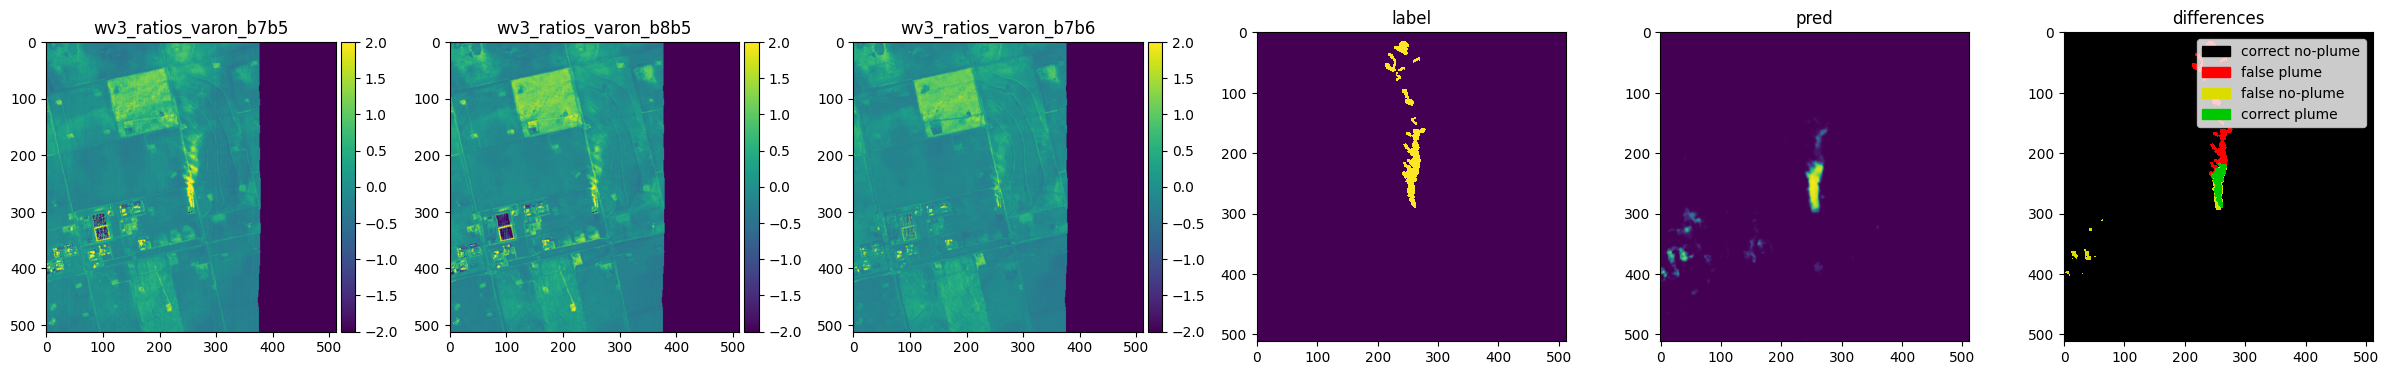

In [14]:
dataloader = msi_dm.test_dataloader(batch_size=1)
how_many = 1
for i, plume_data in enumerate(dataloader):
    plume_data = msi_model.batch_with_preds(to_device(plume_data, msi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=msi_config.dataset.input_products,
                                products_plot=msi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    how_many -=1
    if how_many <= 0: break


In [ ]:
# from starcop.validation import run_validation
# dataloader = msi_dm.test_dataloader(batch_size=1)
# msi_metrics_per_id, msi_metrics = run_validation(msi_model, dataloader, products_plot=msi_config.products_plot, verbose=True,
#                                           show_plots=True, skip_saving_plots=True, # < for showing
#                                           #show_plots=False, skip_saving_plots=False, # < for saving
#                                           path_save_results="multistarcop_outputs")

# # Note: The metrics on this small subset, don't make much sense